In [37]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt



In [38]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

aapl = pdr.get_data_yahoo('HINDALCO.NS', 
                          start=datetime.datetime(2016, 1, 1), 
                          end=datetime.datetime(2020, 1, 1))
aapl.head()

/home/conan/anaconda3/lib/python3.6/site-packages/pandas_datareader/data.py:82: ResourceWarning: unclosed <socket.socket fd=46, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.43.214', 44672), raddr=('27.123.42.204', 443)>
  return YahooDailyReader(*args, **kwargs).read()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,85.250000,84.000000,84.699997,84.900002,2806421.0,82.973434
2016-01-04,85.900002,80.400002,84.199997,80.750000,8706224.0,78.917603
2016-01-05,83.949997,80.599998,82.000000,82.599998,9819068.0,80.725624
2016-01-06,82.849998,79.699997,82.400002,80.550003,6494446.0,78.722145
2016-01-07,79.400002,76.099998,79.000000,76.650002,8098318.0,74.910645


In [39]:
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [40]:
print(aapl.loc[pd.Timestamp('2016, 1, 1'):pd.Timestamp('2020, 1, 1')].head())

print(aapl.loc['2017'].head())

print(aapl.iloc[22:43])

print(aapl.iloc[[22,43], [0, 3]])

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2016-01-01  85.250000  84.000000  84.699997  84.900002  2806421.0  82.973434
2016-01-04  85.900002  80.400002  84.199997  80.750000  8706224.0  78.917603
2016-01-05  83.949997  80.599998  82.000000  82.599998  9819068.0  80.725624
2016-01-06  82.849998  79.699997  82.400002  80.550003  6494446.0  78.722145
2016-01-07  79.400002  76.099998  79.000000  76.650002  8098318.0  74.910645
                  High         Low        Open       Close     Volume  \
Date                                                                    
2017-01-02  159.750000  154.199997  155.850006  158.850006  9537127.0   
2017-01-03  161.000000  157.050003  159.850006  158.850006  6841113.0   
2017-01-04  161.600006  157.449997  158.899994  158.899994  7732019.0   
2017-01-05  162.649994  159.899994  160.000000  162.000000  9921362.0   
2017-01-06  163.800003 

In [41]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2016-08-08  152.149994  146.000000  146.250000  149.149994  20168915.0   
2017-01-12  178.600006  172.399994  175.600006  177.000000  14225168.0   
2018-07-16  220.500000  212.399994  218.000000  213.050003   6440638.0   
2016-02-29   70.800003   66.699997   70.150002   68.750000  15550728.0   
2016-12-01  177.500000  169.699997  176.800003  171.350006   7638033.0   
2016-02-24   68.449997   66.000000   67.599998   66.400002   6136935.0   
2018-12-27  223.899994  219.600006  221.399994  220.600006   7947144.0   
2016-04-05   89.400002   84.349998   88.199997   84.900002  11541211.0   
2018-01-09  277.549988  270.649994  277.549988  271.500000   5197857.0   
2018-10-31  224.350006  216.199997  224.000000  220.399994   9699183.0   
2018-03-08  227.500000  217.699997  226.500000  222.699997   7733982.0   
2019-08-14  181.250000  176.000000  17

In [42]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` colum
del aapl['diff']

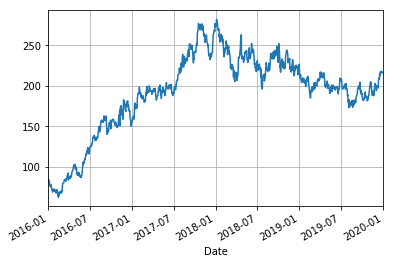

In [43]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Open'].plot(grid=True)

# Show the plot
plt.show()

In [44]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2019-12-19    197.192501
2019-12-20    197.952501
2019-12-23    198.797500
2019-12-24    199.660000
2019-12-26    200.427500
2019-12-27    201.133750
2019-12-30    201.885000
2019-12-31    202.445000
2020-01-01    202.853750
2020-01-02    203.392500
Name: Adj Close, dtype: float64

In [45]:
# daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# # Calculate the daily percentage change for `daily_close_px`
# daily_pct_change = daily_close_px.pct_change()

# # Plot the distributions
# daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# # Show the resulting plot
# plt.show()

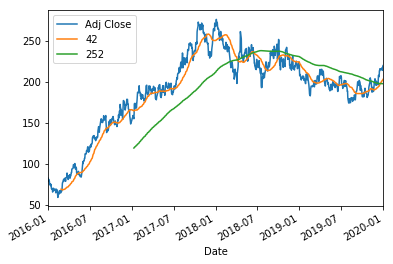

In [46]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

In [47]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

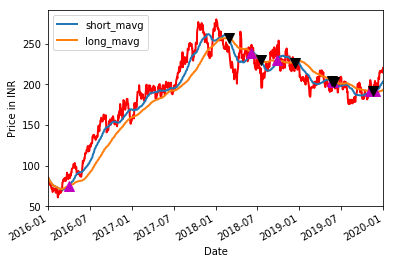

In [48]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in INR')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [49]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['HINDALCO.NS'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

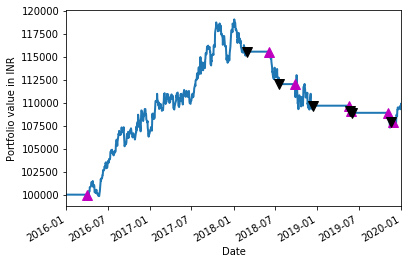

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in INR')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()